# COVID Detection using Chest X-Ray images

##  -Vandit Sheth

In [ ]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Create images with white backgrounds
import plotly.io as pio
pio.templates.default = 'plotly_white'

## Importing data from Drive

File Structure is as follows:


*   ChestXRay
    *  Test
       * NORMAL
       * PNEUMONIA
    *  Train
       * NORMAL
       * PNEUMONIA







In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fid = drive.ListFile({'q':"title='ChestXRay.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('ChestXRay.zip')

In [ ]:
f.keys()

dict_keys(['id', 'kind', 'etag', 'selfLink', 'webContentLink', 'alternateLink', 'embedLink', 'iconLink', 'title', 'mimeType', 'labels', 'copyRequiresWriterPermission', 'createdDate', 'modifiedDate', 'modifiedByMeDate', 'lastViewedByMeDate', 'markedViewedByMeDate', 'version', 'parents', 'downloadUrl', 'userPermission', 'originalFilename', 'fileExtension', 'md5Checksum', 'fileSize', 'quotaBytesUsed', 'ownerNames', 'owners', 'lastModifyingUserName', 'lastModifyingUser', 'capabilities', 'editable', 'copyable', 'writersCanShare', 'shared', 'explicitlyTrashed', 'appDataContents', 'headRevisionId', 'spaces'])

In [ ]:
!unzip ChestXRay.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/PNEUMONIA/person802_bacteria_2708.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person902_bacteria_2827.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person825_bacteria_2736.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1733_bacteria_4566.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person28_bacteria_141.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person494_bacteria_2090.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1088_virus_1800.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person62_bacteria_300.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1328_virus_2295.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1109_bacteria_3050.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person554_bacteria_2320.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person573_bacteria_2369.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1597_bacteria_4192.jpeg  
  inflating: chest_xray/train/P

In [ ]:
PATH = '/content/chest_xray'

In [ ]:
os.listdir('/content/chest_xray')

['.DS_Store', 'test', 'train']

In [ ]:
train_dir = os.path.join(PATH,
                         'train')
test_dir = os.path.join(PATH,
                        'test')

In [ ]:
train_normal_dir = os.path.join(train_dir,
                                'NORMAL')
train_pneumonia_dir = os.path.join(train_dir,
                                   'PNEUMONIA')


test_normal_dir = os.path.join(test_dir,
                               'NORMAL')
test_pneumonia_dir = os.path.join(test_dir,
                                  'PNEUMONIA')


In [ ]:
len(os.listdir(train_dir))

3

In [ ]:
len(os.listdir(train_normal_dir))

1349

#Preparing the data

In [ ]:
IMG_HEIGHT = 212
IMG_WIDTH = 212
batch_size = 32

In [ ]:
image_gen = ImageDataGenerator(
    rescale=1./255
    )

In [ ]:
train_data_gen = image_gen.flow_from_directory(
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'categorical'
    )

Found 5232 images belonging to 2 classes.


In [ ]:
test_data_gen = image_gen.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 624 images belonging to 2 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 3, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

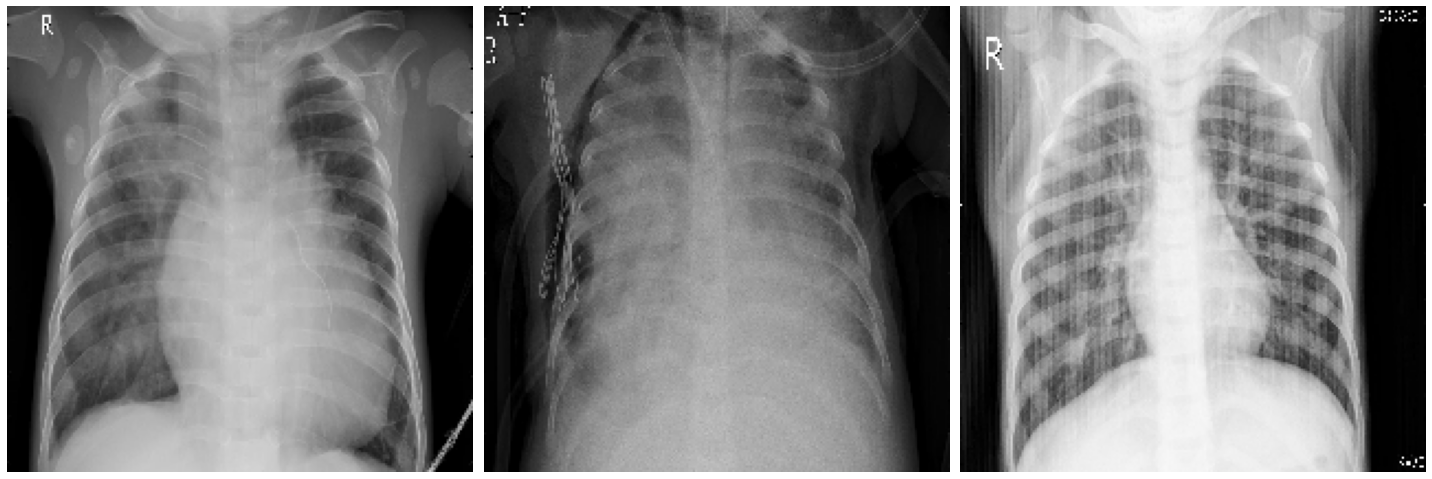

In [ ]:
plotImages(sample_training_images[:3])

#Enhancing the X-Ray images

*   Resizing
*   Text Extraction
*   Histogram equalization



## Histogram Analysis

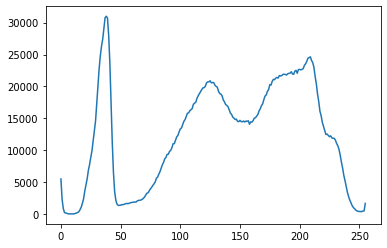

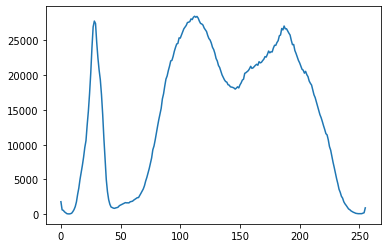

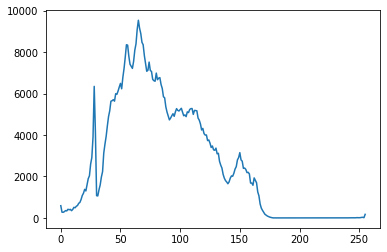

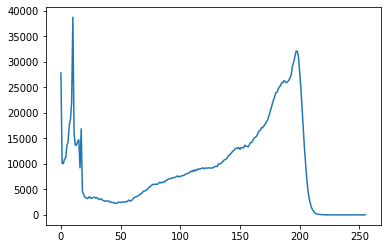

In [ ]:

n1 = cv2.imread('/content/nor1.jpeg',cv2.IMREAD_COLOR)
n1 = cv2.cvtColor(n1,cv2.COLOR_BGR2GRAY)

n2 = cv2.imread('/content/nor2.jpeg',cv2.IMREAD_COLOR)
n2 = cv2.cvtColor(n2,cv2.COLOR_BGR2GRAY)

pn1 = cv2.imread('/content/pn1.jpeg',cv2.IMREAD_COLOR)
pn1 = cv2.cvtColor(pn1,cv2.COLOR_BGR2GRAY)

pn2 = cv2.imread('/content/pn2.jpeg',cv2.IMREAD_COLOR)
pn2 = cv2.cvtColor(pn2,cv2.COLOR_BGR2GRAY)

from matplotlib import pyplot as plt 
histg = cv2.calcHist([n1],[0],None,[256],[0,256])  
plt.plot(histg) 
plt.show() 

histn2 = cv2.calcHist([n2],[0],None,[256],[0,256])  
plt.plot(histn2) 
plt.show() 

histpn1 = cv2.calcHist([pn1],[0],None,[256],[0,256])  
plt.plot(histpn1) 
plt.show() 

histpn2 = cv2.calcHist([pn2],[0],None,[256],[0,256])  
plt.plot(histpn2) 
plt.show() 


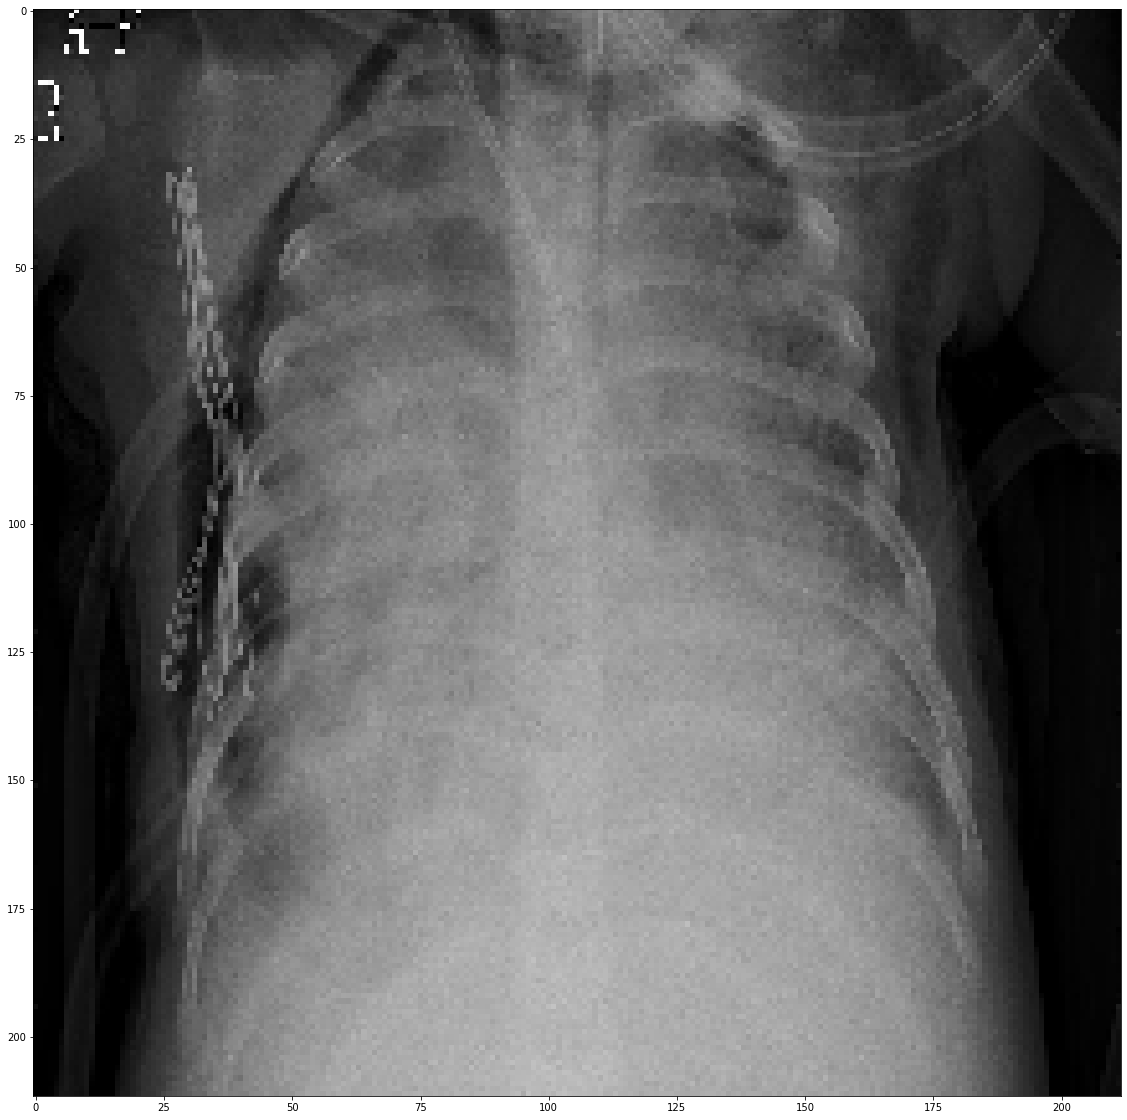

In [ ]:
img = sample_training_images[:3]
#plotImages(img)
fig, ax = plt.subplots(1, 1, figsize=(20,20))
ax.imshow(img[1])


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display

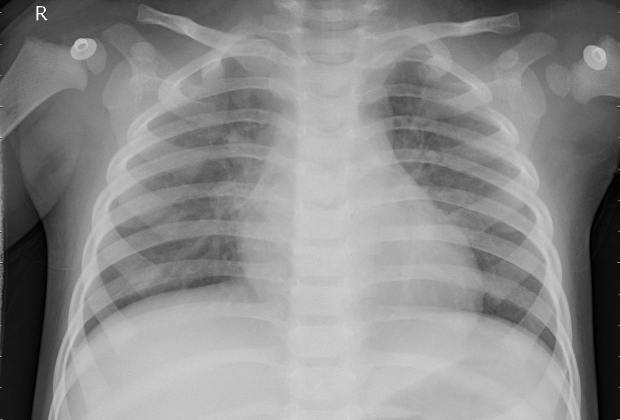

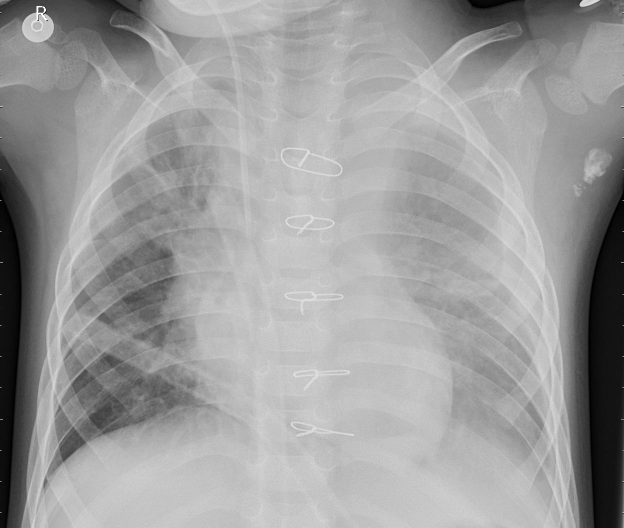

In [ ]:
#Resizing the image
import cv2
img1 = cv2.imread('/content/img1.jpeg',cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2 = cv2.imread('/content/img2.jpeg',cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)


img1 = cv2.resize(img1,((int)(img1.shape[1]*0.5), (int)(img1.shape[0]*0.5)))
img2 = cv2.resize(img2,((int)(img2.shape[1]*0.5), (int)(img2.shape[0]*0.5)))
cv2_imshow(img1)
print()
cv2_imshow(img2)

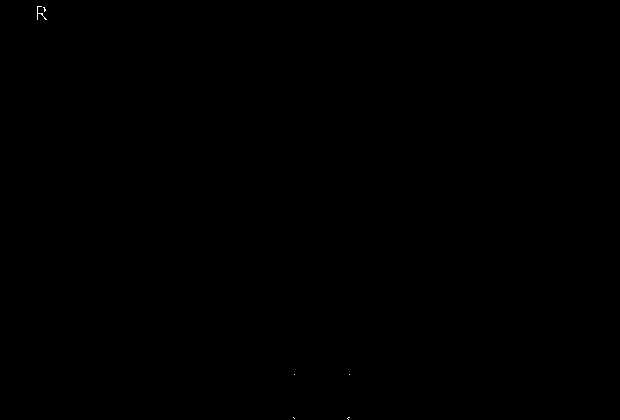

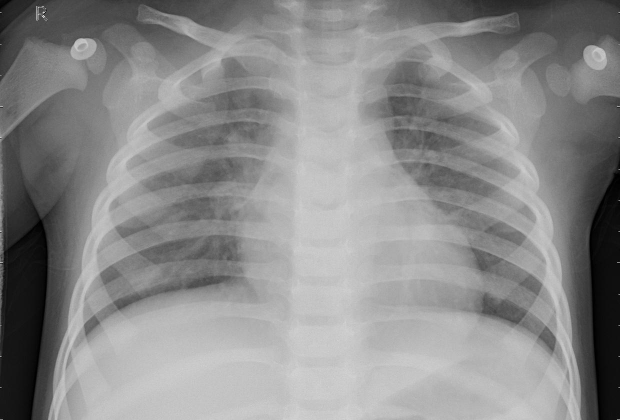

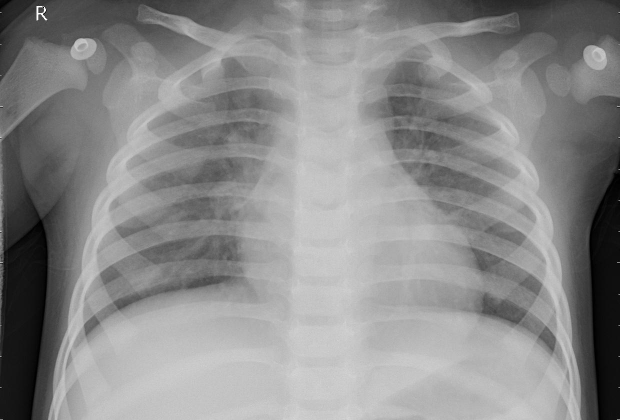

In [ ]:
#Text extraction
ret , thresh1 = cv2.threshold(img1, 210, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh1)
dst = cv2.inpaint(img1, thresh1, 20, cv2.INPAINT_TELEA)
dst2 = (img1 - thresh1)
cv2_imshow(dst)
cv2_imshow(dst2)

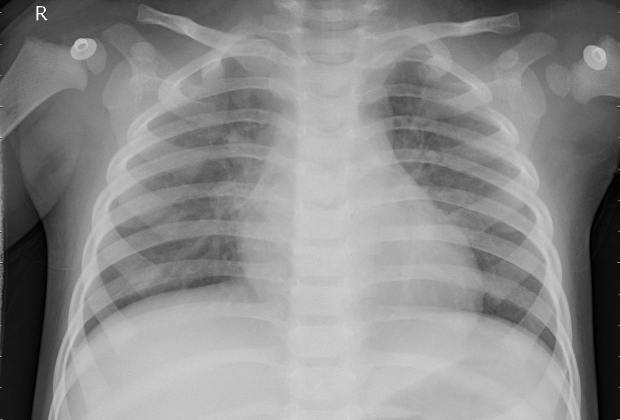

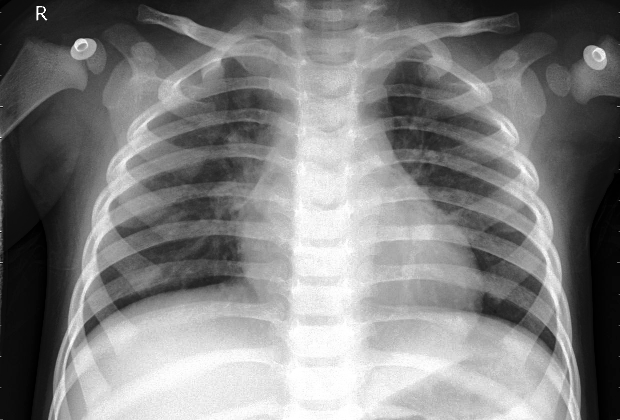

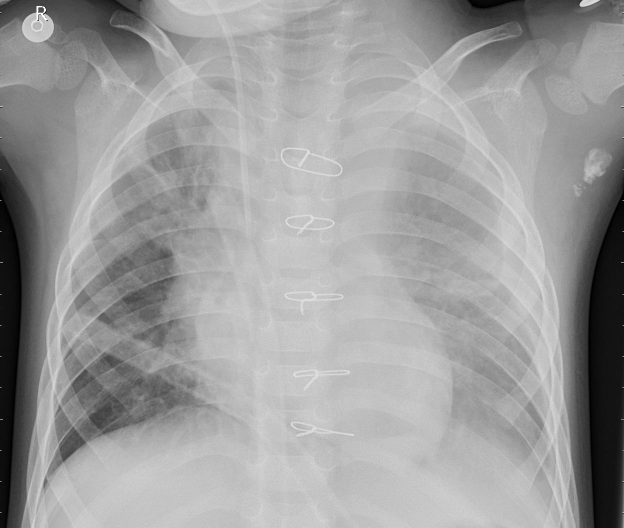

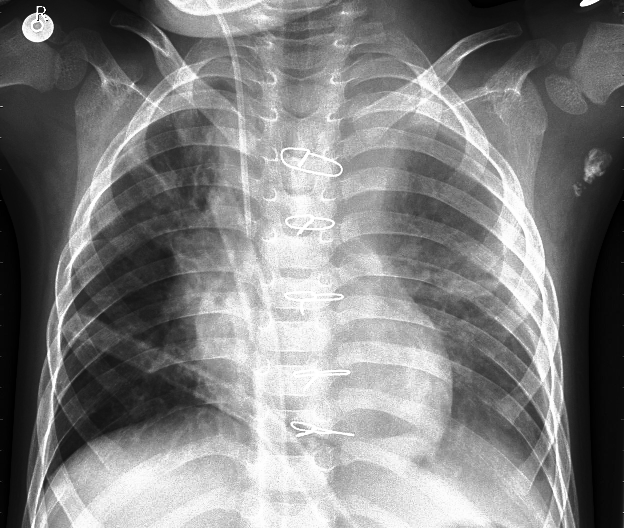

In [ ]:
#Histogram equalization
equ1 = cv2.equalizeHist(img1)
cv2_imshow(img1)
print()
cv2_imshow(equ1) 


print("\n\n\n\n")
equ2 = cv2.equalizeHist(img2)
cv2_imshow(img2)
print()
cv2_imshow(equ2) 

# Creating the neural network

In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 212, 212, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 106, 106, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 106, 106, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0

# Training the model

In [ ]:
batch_size = 32
epochs = 20

In [ ]:
num_normal_train = len(os.listdir(train_normal_dir))
num_pneumonia_train = len(os.listdir(train_pneumonia_dir))


num_normal_test = len(os.listdir(test_normal_dir))
num_pneumonia_test = len(os.listdir(test_pneumonia_dir))


total_train = num_normal_train + num_pneumonia_train
total_test = num_normal_test + num_pneumonia_test

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=total_test // batch_size,
    callbacks = [tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.01,
        patience=7
    )]
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
163/163 [==============================] - 54s 329ms/step - loss: 0.4703 - accuracy: 0.7950 - val_loss: 0.4681 - val_accuracy: 0.8076
Epoch 2/20
163/163 [==============================] - 53s 327ms/step - loss: 0.1575 - accuracy: 0.9396 - val_loss: 0.8083 - val_accuracy: 0.7319
Epoch 3/20
163/163 [==============================] - 53s 325ms/step - loss: 0.1138 - accuracy: 0.9577 - val_loss: 0.5674 - val_accuracy: 0.7944
Epoch 4/20
163/163 [==============================] - 53s 327ms/step - loss: 0.0953 - accuracy: 0.9677 - val_loss: 0.5777 - val_accuracy: 0.7993
Epoch 5/20
163/163 [==============================] - 54s 329ms/step - loss: 0.0783 - accuracy: 0.9721 - val_loss: 1.1432 - val_accuracy: 0.7122
Epoch 6/20
163/163 [==============================] - 53s 325ms/step - loss: 0.0689 - accuracy: 0.9762 - val_loss: 1.2456 - val_accuracy: 0.7599
Epoch 7/20
163/163 [==============================] - 

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['accuracy'],
                         mode='lines+markers',
                         name='Training accuracy'))
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_accuracy'],
                         mode='lines+markers',
                         name='Validation accuracy'))
fig.update_layout(title='Accuracy',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Percentage'))
fig.show()

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
model.save('my_model.h5')

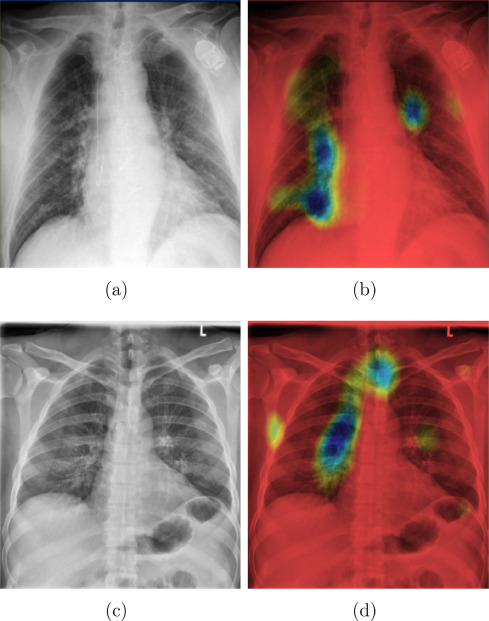